<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Arima2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
od2=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/od32.csv')
od2

,Y
0,61
1,50
2,62
3,47
4,64
...,...
75,88
76,32
77,90
78,31


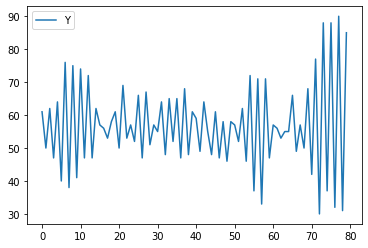

In [49]:
od2.plot()

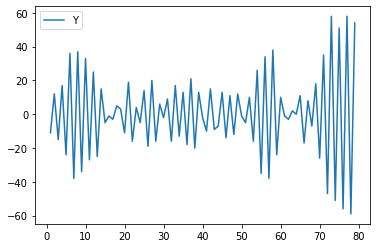

In [50]:

dod2=od2-od2.shift(1)
dod2=dod2.dropna()
dod2.plot()

In [76]:
#testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(od2['Y'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.880186
p-value: 0.047701
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587


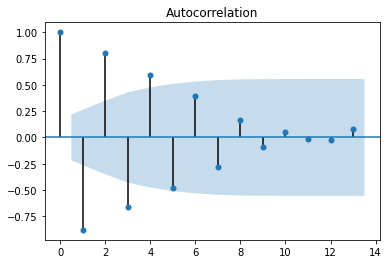

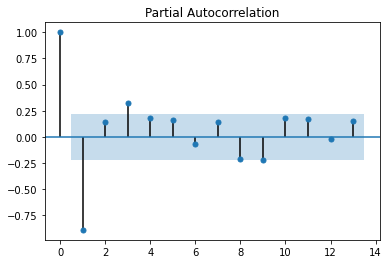

In [63]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(od2, lags=13)
plt.show()
fig = tsaplots.plot_pacf(od2, lags=13)
plt.show()


In [73]:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(od2['Y'],order=(2,0,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      Y   No. Observations:                   80
Model:                     ARMA(2, 0)   Log Likelihood                -248.042
Method:                       css-mle   S.D. of innovations              5.306
Date:                Tue, 03 May 2022   AIC                            504.085
Time:                        21:30:09   BIC                            513.613
Sample:                             0   HQIC                           507.905
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.5783      0.377    150.123      0.000      55.840      57.317
ar.L1.Y       -0.7603      0.109     -6.958      0.000      -0.974      -0.546
ar.L2.Y        0.1811      0.112      1.623      0.109      -0.038       0.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0518           +0.0000j            1.0518            0.5000
AR.2            5.2492           +0.0000j            5.2492            0.0000
-----------------------------------------------------------------------------
"""

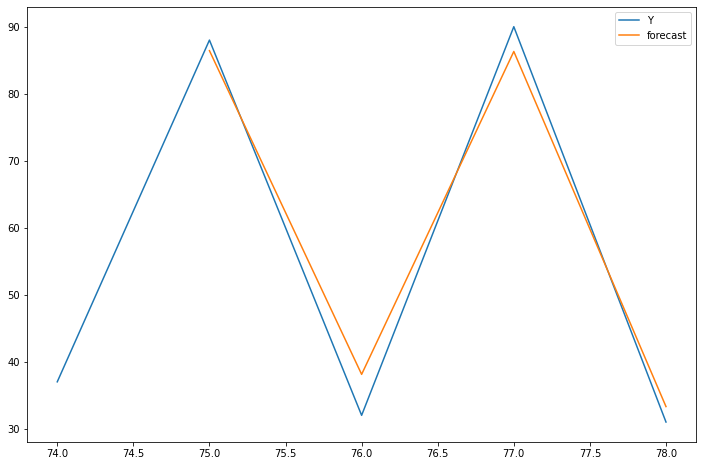

In [75]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(od2['Y'],order=(2, 0, 0))
results=model.fit()
od2['forecast']=results.predict(start=75,end=79,dynamic=False)
od2[['Y','forecast']][74:79].plot(figsize=(12,8))